<a href="https://colab.research.google.com/github/ismaelllamur013/ml_fondo_ojo/blob/main/Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nuevo Codigo

**Objetivo:** Se busca armar un clasificador de enfermedades oculares, a traves de un conjunto de imagenes de fondo de ojos empleando deep learning.

**Probrematicas:** El conjunto de datos esta muy desbalanceado, hay una predominancia de ojos Normales y Cataratas, mientras que las otras clasificaciones pueden llegar a tener hasta 1000 veces menos imagenes, esto por ser casos particulares: un mismo ojo puede tener hasta 3 enfermedades al mismo tiempo.

**Solucion:** Se parte de un conjunto de ojos  


## Ingreso mis librerias y mis datos

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import time
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

## Imagenes 

In [3]:
from tqdm import tqdm
import cv2
import os


dataset_dir= "/content/drive/My Drive/Colab Notebooks/Modelos Computacionales/Proyecto/ODIR-5K/Training Images"

img_size=224

dataset=[]
etiquetas=[]
def crear_dataset(categoria_imagen,etiquetas):


  for img in tqdm(categoria_imagen):
    imagen=os.path.join(dataset_dir,img)
    try:
      image = cv2.imread(imagen,cv2.IMREAD_COLOR)
      image = cv2.resize(image,(img_size,img_size))
    except:
      continue

    dataset.append([np.array(image),np.array(etiquetas)])
  return dataset

In [4]:
seed = 7
np.random.seed(seed)

data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Modelos Computacionales/Proyecto/full_df.csv")

In [5]:
df=pd.DataFrame(data)
df.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg


In [6]:
aux=df['labels']
nombre=df['filename']
ayuda=pd.DataFrame(pd.concat([aux,nombre],axis=1))
guia=ayuda['labels']=="['N']"

In [7]:
normal=[]
anormal=[]
for u,i in enumerate(guia):
  if i == True:
    normal.append(ayuda['filename'][u])
  else:
    anormal.append(ayuda['filename'][u])

In [8]:
dataset=crear_dataset(normal,0)
dataset=crear_dataset(anormal,1)

100%|██████████| 3519/3519 [32:01<00:00,  1.83it/s]


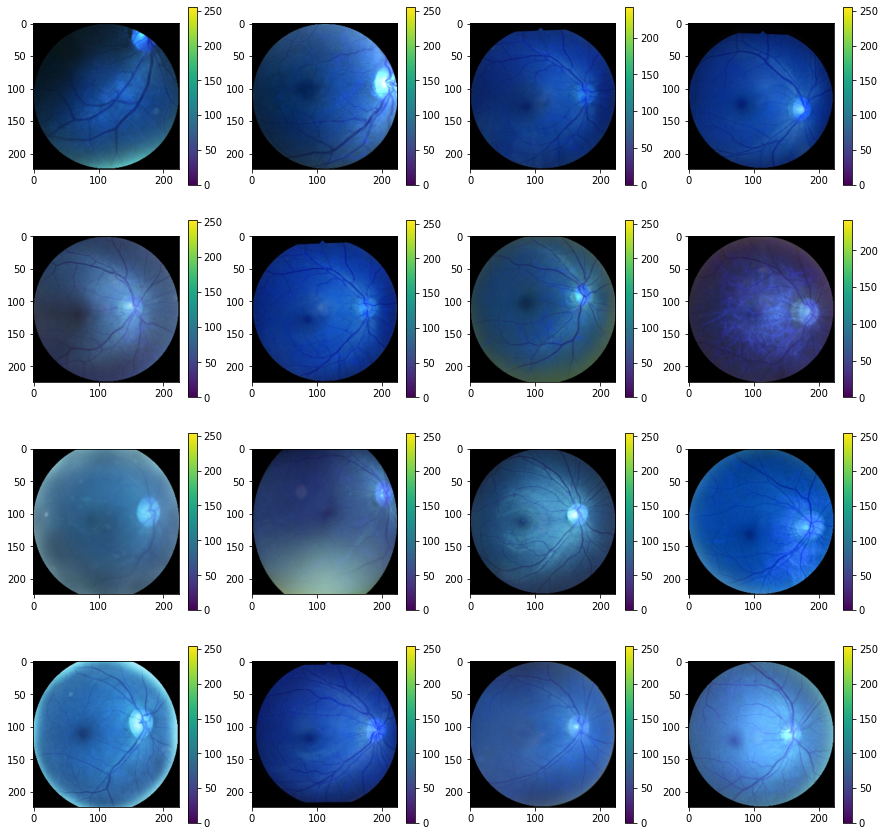

In [9]:
plt.figure(figsize=(15,15))
for i in range(4*4):
  if i%2==0:
    plt.subplot(4,4,i+1)
    plt.imshow(np.squeeze(dataset[i+52][0]))
    plt.colorbar()
    plt.grid(False)
  else:
    plt.subplot(4,4,i+1)
    plt.imshow(np.squeeze(dataset[i+52][0]))
    plt.colorbar()
    plt.grid(False)


In [10]:
x = np.array([i[0] for i in dataset]).reshape(-1, img_size, img_size, 3)
y = np.array([i[1] for i in dataset])

In [ ]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
x.shape

(6392, 224, 224, 3)

In [ ]:
y.shape

(6392,)

## Analicis con estadisticos de textura, en escalas de grises a partir de la matriz de coocurrencia

Clasificadores Random Forest y Deep Learning

In [11]:
from skimage.feature import greycomatrix, greycoprops
from scipy.stats import kurtosis
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [12]:
score=[]
x = x.astype('uint32')
for j in range(1,40):
  g=[]
  for k in range(len(x)):
    g.append(greycomatrix(x[k][:,:,2], [j], [0, np.pi/4, np.pi/2, 3*np.pi/4], levels=256))

  inf=[]
  for i in range(len(x)):
    a=greycoprops(g[i], 'dissimilarity')[0]
    b=greycoprops(g[i], 'correlation')[0]
    c=greycoprops(g[i], 'contrast')[0]
    d=greycoprops(g[i], 'homogeneity')[0]
    e=greycoprops(g[i], 'ASM')[0]
    f=greycoprops(g[i], 'energy')[0]
    mean=np.array([np.mean(g[i])])
    desv=np.array([np.std(g[i])])
    kurt=np.array([kurtosis(g[i],axis=None)])
    inf.append(np.concatenate((a,b,c,d,e,f,mean,desv,kurt)))

  clf = RandomForestClassifier(n_estimators=1000,criterion='gini',random_state=0)
  x_train, x_test, y_train, y_test = train_test_split(inf, y, test_size = 0.20, random_state = 101)
  clf.fit(x_train, y_train)
  score.append(clf.score( x_test , y_test ))
#clf.score( x_test , y_test )

Se evalua para distintos numeros de distancias 

Entropy[0.5668491008600469,
 0.562157935887412,
 0.5809225957779516,
 0.5832681782642689,
 0.5910867865519938,
 0.5770132916340891,
 0.584831899921814,
 0.5824863174354965,
 0.584831899921814,
 0.5824863174354965,
 0.5887412040656763,
 0.5824863174354965,
 0.5887412040656763,
 0.584831899921814,
 0.5715402658326818,
 0.5613760750586395,
 0.5629397967161845,
 0.5598123534010946,
 0.5707584050039093]

Gini[0.5691946833463644,
 0.5895230648944488,
 0.5856137607505864,
 0.5770132916340891,
 0.5809225957779516,
 0.581704456606724,
 0.596559812353401,
 0.581704456606724,
 0.5809225957779516,
 0.5676309616888194,
 0.5840500390930414,
 0.5707584050039093,
 0.5871774824081314,
 0.5645035183737295,
 0.5785770132916341,
 0.5801407349491791,
 0.5527756059421423,
 0.5895230648944488,
 0.5605942142298671]

In [15]:
score

[0.5801407349491791,
 0.5863956215793589,
 0.5863956215793589,
 0.5973416731821736,
 0.5895230648944488,
 0.5887412040656763,
 0.5809225957779516,
 0.5668491008600469,
 0.5824863174354965,
 0.5832681782642689,
 0.581704456606724,
 0.5832681782642689,
 0.5762314308053167,
 0.5762314308053167,
 0.5824863174354965,
 0.5715402658326818,
 0.5699765441751369,
 0.5699765441751369,
 0.5746677091477717,
 0.5832681782642689,
 0.5770132916340891,
 0.5832681782642689,
 0.5715402658326818,
 0.5895230648944488,
 0.5879593432369038,
 0.5684128225175918,
 0.5777951524628616,
 0.5770132916340891,
 0.5832681782642689,
 0.5754495699765442,
 0.5840500390930414,
 0.5801407349491791,
 0.581704456606724,
 0.5770132916340891,
 0.5770132916340891,
 0.5785770132916341,
 0.5824863174354965,
 0.5699765441751369,
 0.5770132916340891]

In [13]:
score

[0.5863956215793589,
 0.5809225957779516,
 0.581704456606724,
 0.5715402658326818,
 0.5746677091477717,
 0.5754495699765442,
 0.5684128225175918,
 0.5777951524628616,
 0.5684128225175918,
 0.5559030492572322,
 0.5598123534010946,
 0.5707584050039093,
 0.5723221266614542,
 0.5668491008600469,
 0.5691946833463644,
 0.5691946833463644,
 0.562157935887412,
 0.5723221266614542,
 0.5574667709147771,
 0.563721657544957,
 0.5613760750586395,
 0.5605942142298671,
 0.5574667709147771,
 0.5598123534010946,
 0.5590304925723222,
 0.5613760750586395,
 0.5691946833463644,
 0.5691946833463644,
 0.5738858483189992,
 0.5699765441751369,
 0.5746677091477717,
 0.5777951524628616,
 0.5699765441751369,
 0.5746677091477717,
 0.5793588741204065,
 0.5801407349491791,
 0.5684128225175918,
 0.5746677091477717,
 0.5762314308053167]

In [13]:
score

[0.5746677091477717,
 0.5723221266614542,
 0.5770132916340891,
 0.5668491008600469,
 0.5785770132916341,
 0.5785770132916341,
 0.5824863174354965,
 0.5746677091477717,
 0.5777951524628616,
 0.5910867865519938,
 0.596559812353401,
 0.5903049257232212,
 0.6012509773260359,
 0.6082877247849883,
 0.6082877247849883,
 0.5895230648944488,
 0.5910867865519938,
 0.5895230648944488,
 0.5840500390930414,
 0.5871774824081314,
 0.6067240031274433,
 0.6051602814698983,
 0.6020328381548085,
 0.5949960906958561,
 0.5949960906958561,
 0.5957779515246286,
 0.5989053948397185,
 0.5934323690383112,
 0.5895230648944488,
 0.5957779515246286,
 0.5918686473807663,
 0.5918686473807663,
 0.5910867865519938,
 0.5832681782642689,
 0.5871774824081314,
 0.5895230648944488,
 0.5793588741204065,
 0.584831899921814,
 0.5738858483189992]

In [ ]:
#x = x.astype('uint32')
g=[]
for k in range(len(x)):
  g.append(greycomatrix(x[k][:,:,2], [21], [0, np.pi/4, np.pi/2, 3*np.pi/4], levels=256))

inf=[]
for i in range(len(x)):
  a=greycoprops(g[i], 'dissimilarity')[0]
  b=greycoprops(g[i], 'correlation')[0]
  c=greycoprops(g[i], 'contrast')[0]
  d=greycoprops(g[i], 'homogeneity')[0]
  e=greycoprops(g[i], 'ASM')[0]
  f=greycoprops(g[i], 'energy')[0]
  mean=np.array([np.mean(g[i])])
  desv=np.array([np.std(g[i])])
  kurt=np.array([kurtosis(g[i],axis=None)])
  inf.append(np.concatenate((a,b,c,d,e,f,mean,desv,kurt)))

#x_train, x_test, y_train, y_test = train_test_split(inf, y, test_size = 0.20, random_state = 101)


In [ ]:
len(g)
x_train, x_test, y_train, y_test = train_test_split(g, y, test_size = 0.20, random_state = 101)

In [ ]:
x_train[0].shape

(256, 256, 1, 4)

In [ ]:
from keras import layers  
from keras.layers import Flatten, Dense, Activation
from keras.models import Sequential, Model, load_model  

In [ ]:
def create_simple_nn():  
  model = Sequential()
  model.add(Flatten(input_shape=(256, 256, 1, 4), name="Input_layer"))
  #model.add(Flatten(input_shape=(27,), name="Input_layer"))
  model.add(Dense(93, activation='sigmoid', name="Hidden_layer_1"))
  model.add(Dense(67, activation='sigmoid', name="Hidden_layer_2"))
  model.add(Dense(33, activation='sigmoid', name="Hidden_layer_3"))
  model.add(Dense(1, activation='softmax', name="Output_layer"))

  return model

snn_model = create_simple_nn()  
snn_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['acc'])  

snn_model.summary()

snn = snn_model.fit(np.array(x_train), y_train, batch_size=20, epochs=10, verbose=1, validation_data=(np.array(x_test), y_test)) 

## Analicis con redes convolucionales

Se utilizara una hecha por el usuario, otra sera VGG19 y por ultimo InceptionV3


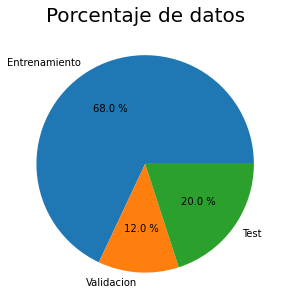

In [ ]:
datos = [68,12,20]
nombres = ["Entrenamiento","Validacion","Test"]
plt.figure(figsize=(5,5))
plt.title("Porcentaje de datos",fontsize=20)
plt.pie(datos, labels=nombres, autopct="%0.1f %%")
plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 101)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.15, random_state = 101)

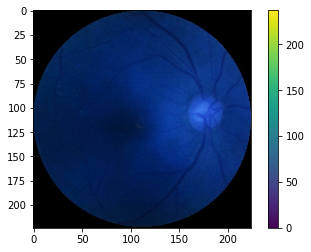

In [ ]:
plt.figure()
plt.imshow(np.squeeze(x_train[10]))
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
from keras import regularizers
#from keras.preprocessing.text import Tokenizer
from keras.models import Sequential, Model
# Importemos las capas "core" de Keras. Estas son las capas que se utilizan en casi cualquier red neuronal.
from keras.layers import Dense, Dropout, Flatten, Activation
# Rmportaremos las capas CNN de Keras. Estas son las capas convolucionales que nos ayudarán a entrenar eficientemente en datos de imágenes.
from keras.layers import Conv2D, MaxPooling2D
from keras.layers. normalization import BatchNormalization
from keras.optimizers import SGD

In [ ]:
def modelo():
  weight_decay = 0.00005
  num_labels = 1
  
  model = Sequential()

  model.add(Conv2D(33, kernel_size = (3, 3),kernel_regularizer=regularizers.l2(weight_decay), activation='sigmoid', input_shape=(img_size, img_size,3)))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(BatchNormalization())
  model.add(Dropout(0.2)) 

  model.add(Conv2D(65, kernel_size=(3,3),kernel_regularizer=regularizers.l2(weight_decay), activation='sigmoid'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(BatchNormalization())
  model.add(Dropout(0.2)) 

  model.add(Conv2D(93, kernel_size=(3,3),kernel_regularizer=regularizers.l2(weight_decay), activation='sigmoid'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(BatchNormalization())
  model.add(Dropout(0.2)) 


  model.add(Flatten())


  model.add(Dense(num_labels, activation = 'softmax'))

  model.summary()
  
  #sgd = SGD(lr=0.00005, decay=1e-6, momentum=0.9, nesterov=True)
  model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics = ['accuracy']) 
  
  return model


In [ ]:
model=modelo()
history = model.fit(np.array(x_train), y_train, batch_size=32, epochs=10, verbose=1, validation_data=(np.array(x_test), y_test), shuffle=True) 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 33)      924       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 33)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 111, 111, 33)      132       
_________________________________________________________________
dropout (Dropout)            (None, 111, 111, 33)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 65)      19370     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 65)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 54, 54, 65)        2

In [ ]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("Error: %.2f%%" % (100-scores[1]*100))

Error: 54.81%


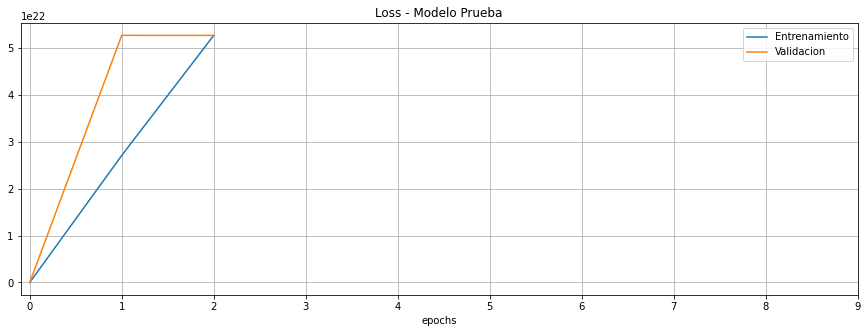

In [ ]:
plt.figure(figsize=(15,5))
plt.title('Loss - Modelo Prueba')
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validacion')
plt.xlabel("epochs")
plt.xticks(np.arange(0,len(history.history['loss'])))
plt.legend()
plt.grid(True)
plt.show()

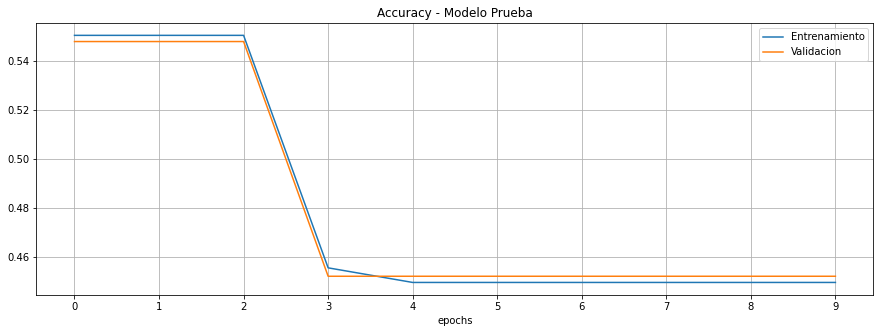

In [ ]:
plt.figure(figsize=(15,5))
plt.title('Accuracy - Modelo Prueba')
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validacion')
plt.xlabel("epochs")
plt.xticks(np.arange(0,len(history.history['accuracy'])))
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19

vgg = VGG19(weights="imagenet",include_top = False,input_shape=(img_size,img_size,3))
for layer in vgg.layers:
    layer.trainable = False
model = Sequential()
model.add(vgg)
model.add(Flatten())
model.add(Dense(1,activation="sigmoid"))
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics = ['accuracy']) 
history = model.fit(np.array(x_train), y_train, batch_size=200, epochs=10, verbose=1, validation_data=(np.array(x_test), y_test), shuffle=True) 

80142336/80134624 [==============================] - 1s 0us/step
Epoch 1/10
22/22 [==============================] - 144s 5s/step - loss: 0.0000e+00 - accuracy: 0.4557 - val_loss: 0.0000e+00 - val_accuracy: 0.4519
Epoch 2/10
22/22 [==============================] - 48s 2s/step - loss: 0.0000e+00 - accuracy: 0.4481 - val_loss: 0.0000e+00 - val_accuracy: 0.4519
Epoch 3/10
22/22 [==============================] - 48s 2s/step - loss: 0.0000e+00 - accuracy: 0.4629 - val_loss: 0.0000e+00 - val_accuracy: 0.4519
Epoch 4/10
22/22 [==============================] - 48s 2s/step - loss: 0.0000e+00 - accuracy: 0.4658 - val_loss: 0.0000e+00 - val_accuracy: 0.4519
Epoch 5/10
22/22 [==============================] - 48s 2s/step - loss: 0.0000e+00 - accuracy: 0.4506 - val_loss: 0.0000e+00 - val_accuracy: 0.4519
Epoch 6/10
22/22 [==============================] - 48s 2s/step - loss: 0.0000e+00 - accuracy: 0.4577 - val_loss: 0.0000e+00 - val_accuracy: 0.4519
Epoch 7/10
22/22 [============================

In [ ]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("Error: %.2f%%" % (100-scores[1]*100))

Error: 54.81%


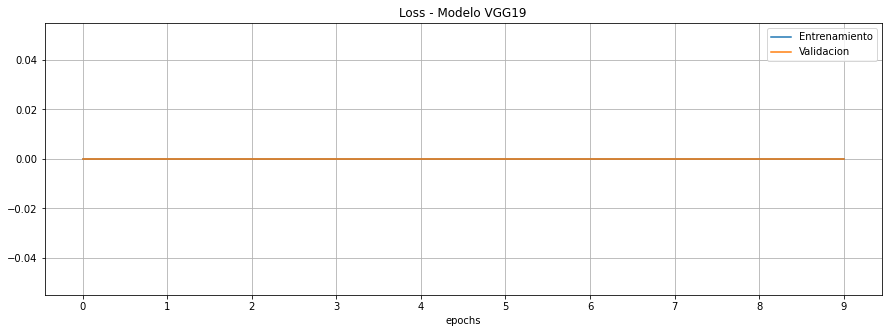

In [ ]:
plt.figure(figsize=(15,5))
plt.title('Loss - Modelo VGG19')
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validacion')
plt.xticks(np.arange(0,len(history.history['loss'])))
plt.xlabel("epochs")
plt.legend()
plt.grid(True)
plt.show()

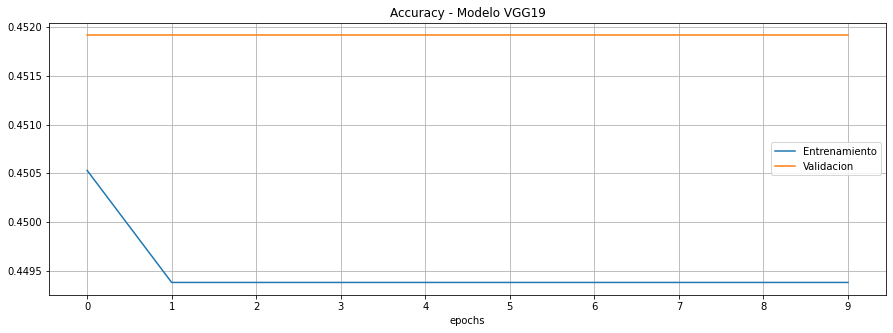

In [ ]:
plt.figure(figsize=(15,5))
plt.title('Accuracy - Modelo VGG19')
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validacion')
plt.xticks(np.arange(0,len(history.history['accuracy'])))
plt.xlabel("epochs")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from tensorflow.keras.applications import InceptionV3
IV3=InceptionV3(weights="imagenet",include_top = False,input_shape=(img_size,img_size,3))
for layer in IV3.layers:
    layer.trainable = False
model = Sequential()
model.add(IV3)
model.add(Flatten())
model.add(Dense(1,activation="sigmoid"))
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics = ['accuracy']) 
history = model.fit(np.array(x_train), y_train, batch_size=32, epochs=10, verbose=1, validation_data=(np.array(x_test), y_test), shuffle=True) 

87916544/87910968 [==============================] - 1s 0us/step
Epoch 1/10
136/136 [==============================] - 38s 232ms/step - loss: 0.0000e+00 - accuracy: 0.4503 - val_loss: 0.0000e+00 - val_accuracy: 0.4519
Epoch 2/10
136/136 [==============================] - 27s 199ms/step - loss: 0.0000e+00 - accuracy: 0.4630 - val_loss: 0.0000e+00 - val_accuracy: 0.4519
Epoch 3/10
136/136 [==============================] - 27s 200ms/step - loss: 0.0000e+00 - accuracy: 0.4555 - val_loss: 0.0000e+00 - val_accuracy: 0.4519
Epoch 4/10
136/136 [==============================] - 27s 199ms/step - loss: 0.0000e+00 - accuracy: 0.4573 - val_loss: 0.0000e+00 - val_accuracy: 0.4519
Epoch 5/10
136/136 [==============================] - 27s 199ms/step - loss: 0.0000e+00 - accuracy: 0.4445 - val_loss: 0.0000e+00 - val_accuracy: 0.4519
Epoch 6/10
136/136 [==============================] - 27s 199ms/step - loss: 0.0000e+00 - accuracy: 0.4480 - val_loss: 0.0000e+00 - val_accuracy: 0.4519
Epoch 7/10
136/13

# Viejo Codigo

In [ ]:
import cv2
import os

ruta_img= "/content/drive/My Drive/Colab Notebooks/Modelos Computacionales/Proyecto/ODIR-5K/Training Images"


imagenesright=[]
imagenesleft=[]

etiquetaright=[]
etiquetaleft=[]

img_size=150
rutasplit=[]
j=0

for img in os.listdir(ruta_img):                                              
  rutasplit= os.path.split(img)
  rutasplit2= rutasplit[1]
  rutasplit2= rutasplit2.partition("_")
  label= rutasplit2[2].partition(".")
  if label[0]== "right":
    img = cv2.imread(os.path.join(ruta_img,img),-1)
    #img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #
    img_resize = cv2.resize(img,(img_size,img_size))
    imagenesright.append([img_resize])
    etiquetaright.append(rutasplit[1])
  elif label[0] == "left":
    img = cv2.imread(os.path.join(ruta_img,img),-1)
    #img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #
    img_resize = cv2.resize(img,(img_size,img_size))
    imagenesleft.append([img_resize])
    etiquetaleft.append(rutasplit[1])                                                              
  
  j=j+1
  print(j)

## Etiquetas e informacion de la base de datos


Cargo el Exel donde se encuenctra la informacion

In [ ]:
import numpy as np 
import pandas as pd 

seed = 7
np.random.seed(seed)

data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Modelos Computacionales/Proyecto/full_df.csv")

Creo el DataFrame donde tendre mis caracteristicas y mis imagentes respectivamente

In [ ]:
df2=pd.DataFrame(data)

for u,i in enumerate(etiquetaleft):
  for j in range(len(df2["filename"])):
    if df2["filename"][j]==i:
      df2["filename"][j]=imagenesleft[u]

for u,i in enumerate(etiquetaright):
  for j in range(len(df2["filename"])):
    if df2["filename"][j]==i:
      df2["filename"][j]=imagenesright[u]

df2.head(-1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]","[[[[0 0 0], [0 0 0], [0 0 0], [0 0 0], [0 0 0]..."
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]","[[[[0 0 0], [0 0 0], [0 0 0], [0 0 0], [0 0 0]..."
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]","[[[[0 0 0], [0 0 0], [0 0 0], [0 0 0], [0 0 0]..."
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]","[[[[0 0 0], [0 0 0], [0 0 0], [0 0 0], [0 0 0]..."
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]","[[[[0 0 0], [0 0 0], [0 0 0], [0 0 0], [0 0 0]..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6386,4683,58,Male,4683_left.jpg,4683_right.jpg,normal fundus,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]","[[[[0 0 0], [0 0 0], [0 0 0], [0 0 0], [0 0 0]..."
6387,4686,63,Male,4686_left.jpg,4686_right.jpg,severe nonproliferative retinopathy,proliferative diabetic retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]","[[[[0 0 0], [0 0 0], [0 0 0], [0 0 0], [0 0 0]..."
6388,4688,42,Male,4688_left.jpg,4688_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]","[[[[0 0 0], [0 0 0], [0 0 0], [0 0 0], [0 0 0]..."
6389,4689,54,Male,4689_left.jpg,4689_right.jpg,mild nonproliferative retinopathy,normal fundus,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]","[[[[0 0 0], [0 0 0], [0 0 0], [0 0 0], [0 0 0]..."


##  Desbalance en mi conjunto


* Normal (N)

* Diabetes (D)

* Glaucoma (G)

* Catarata (C)

* Degeneración macular relacionada con la edad (A)

* Hipertensión (H)

* Miopía patológica (M)

* Otras enfermedades / anomalías (O)

Busco unificar en un solo arreglo las posibles combinaciones de enfermedades que puedo tener las cuales seran mis correspondientes etiquetas. Sabiendo que esta solo puede tener una combinacion de a como mucho dos enfermedades

In [ ]:
dfE= df2[['N','D','G','C','A','H','M','O']]

In [ ]:
for x in dfE.columns:
  dfE[x]=dfE[x].astype(str)
dfE['binary']=dfE[dfE.columns].values.sum(axis=1)
dfE['binary']=dfE['binary'].apply(lambda x: int(x,2))

In [ ]:
from collections import Counter
a=list(dfE["binary"])
c=Counter(a)
c.keys()

dict_keys([16, 128, 65, 64, 1, 68, 2, 4, 40, 66, 8, 72, 80, 36, 17, 9, 32, 81, 69, 12, 5, 20, 49, 96, 74, 3, 33, 34, 37, 97, 48, 67, 98, 73, 10, 35, 41])

In [ ]:
for i in ['N','D','G','C','A','H','M','O']:
  print(i)
  print(dfE[i].value_counts())

N
0    4291
1    2101
Name: N, dtype: int64
D
0    4269
1    2123
Name: D, dtype: int64
G
0    5995
1     397
Name: G, dtype: int64
C
0    5990
1     402
Name: C, dtype: int64
A
0    6073
1     319
Name: A, dtype: int64
H
0    6189
1     203
Name: H, dtype: int64
M
0    6086
1     306
Name: M, dtype: int64
O
0    4804
1    1588
Name: O, dtype: int64


In [ ]:
N=np.zeros(8)
for v,i in enumerate(["['N']","['D']","['G']","['C']","['A']","['H']","['M']","['O']"]):
  for j in df2["labels"]:
    if j==i:
      N[v]=N[v]+1
    
N  

array([2873., 1608.,  284.,  293.,  266.,  128.,  232.,  708.])

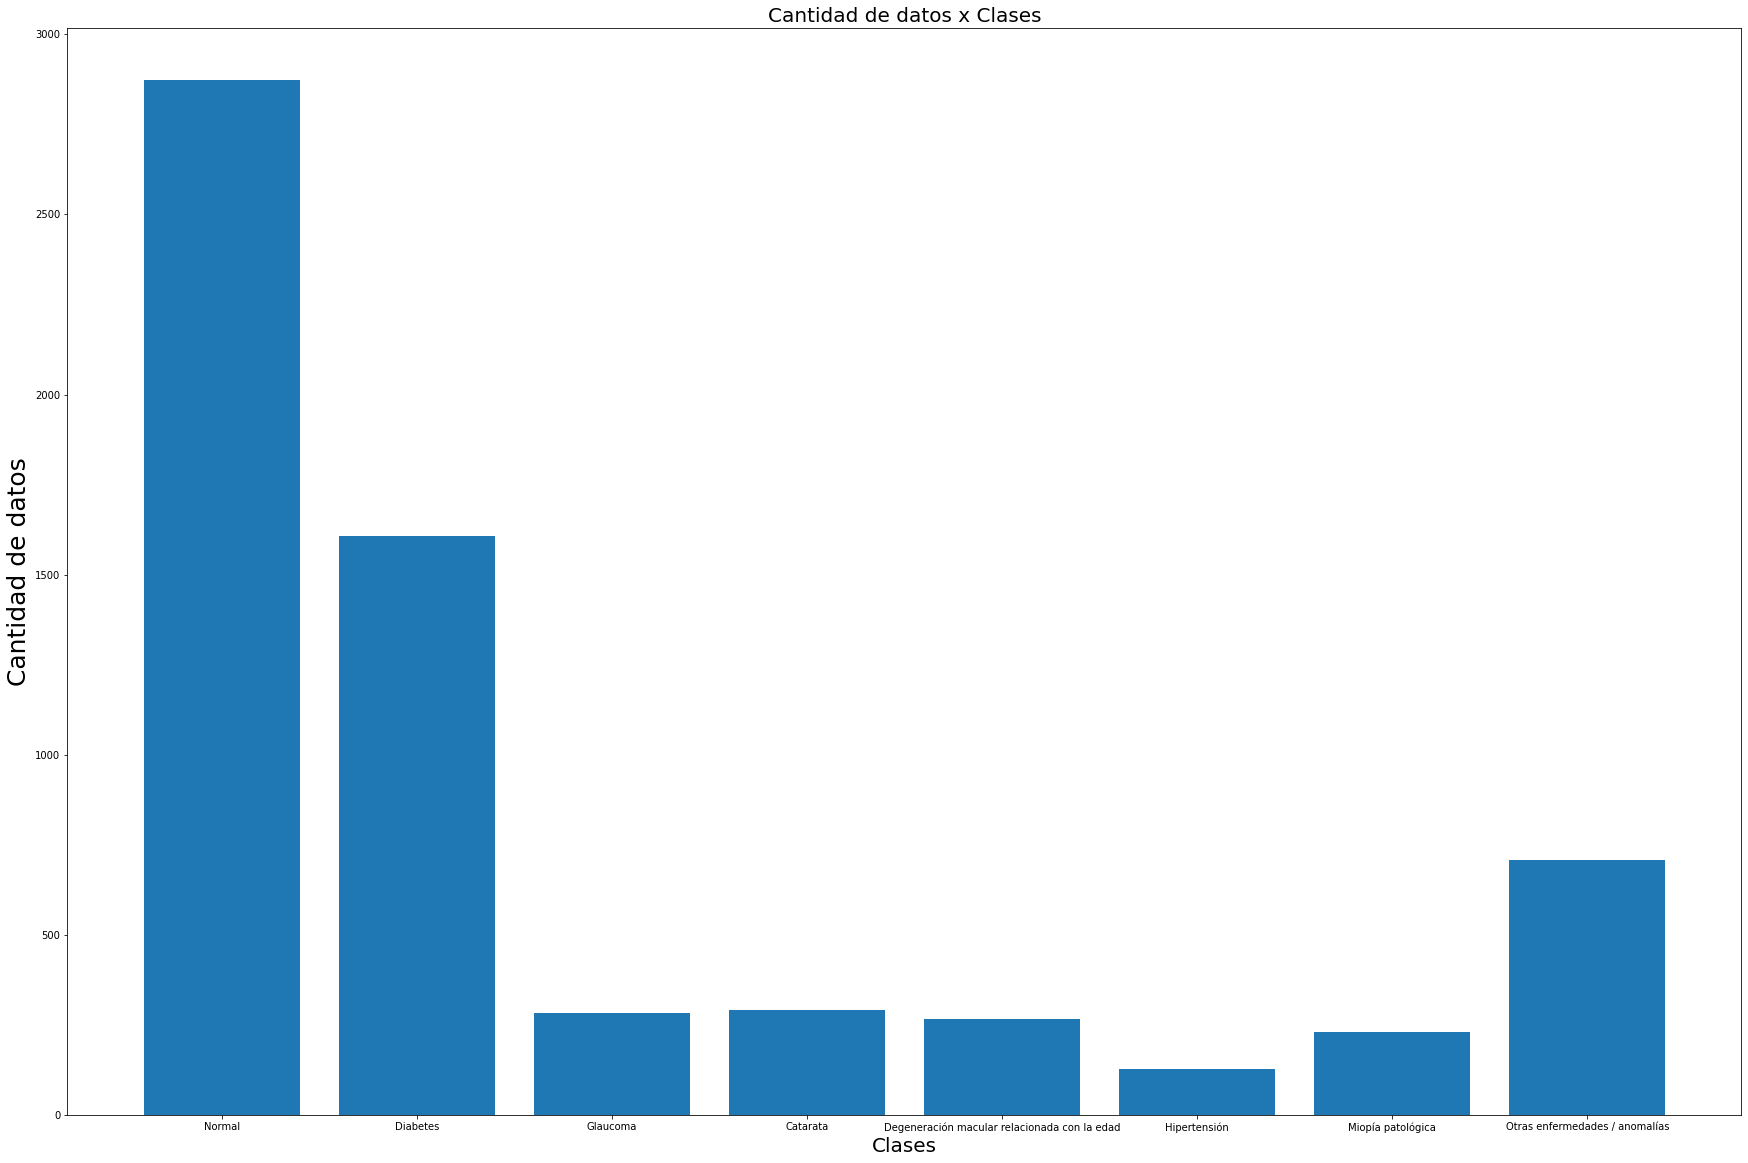

In [ ]:
diccionario={"N": 2101,"D": 2123, "G": 397, "C": 402, "A": 319, "H": 203, "M": 306,"O": 1588}
etiquetas=["Normal","Diabetes", "Glaucoma", "Catarata", "Degeneración macular relacionada con la edad", "Hipertensión", "Miopía patológica","Otras enfermedades / anomalías"]
cantidades=[2873,  1608, 284,  293, 266, 128,  232, 708]
plt.figure(figsize=(30,20))
plt.bar(etiquetas,cantidades)
plt.title("Cantidad de datos x Clases",fontsize=20)
plt.xlabel("Clases",fontsize=20)
plt.ylabel("Cantidad de datos",fontsize=25)
plt.show()

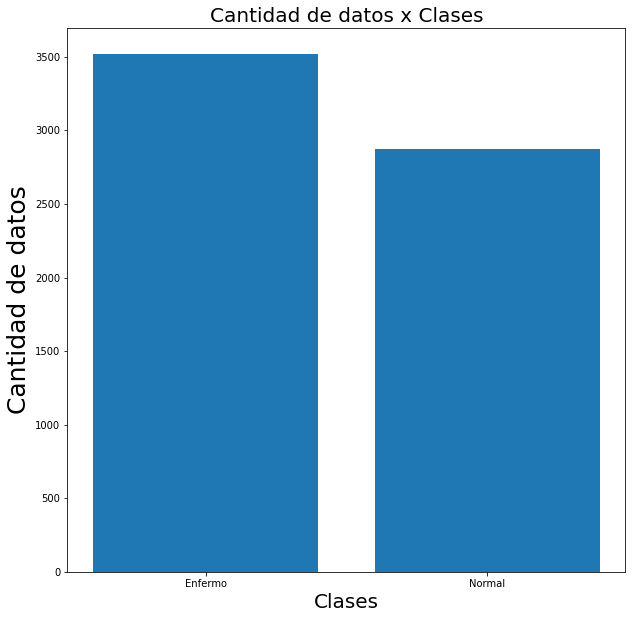

In [ ]:
cantidad2=[3519,2873] 
etiqueta2=["Enfermo","Normal"]    
plt.figure(figsize=(10,10))
plt.bar(etiqueta2,cantidad2)
plt.title("Cantidad de datos x Clases",fontsize=20)
plt.xlabel("Clases",fontsize=20)
plt.ylabel("Cantidad de datos",fontsize=25)
plt.show() 

## Implementacion

In [ ]:
Y=pd.DataFrame(index=np.arange(0,len(df2),1),columns=["N"])
for v,i in enumerate(df2['labels']):
  if i == "['N']":
    Y["N"][v]=1
  else:
    Y["N"][v]=0
Y.head(-1)

,N
0,1
1,1
2,0
3,0
4,0
...,...
6386,1
6387,0
6388,0
6389,0


In [ ]:
X = df2[["filename"]]   
Y = pd.get_dummies(Y)                                                          

In [ ]:
Y.value_counts()

N_0  N_1
1    0      3519
0    1      2873
dtype: int64

In [ ]:
X=X.to_numpy()

### Dropout

Es un método para regularizar nuestro modelo para evitar el sobreajuste.



### MaxPooling2D


Es una forma de reducir el número de parámetros en nuestro modelo deslizando un filtro de agrupación (pooling) de 2x2 a través de la capa anterior y tomando el máximo de los 4 valores en el filtro de 2x2.



### Batch Normalization


Keras proporciona una capa llamada BatchNormalization que normaliza la activación de la capa anterior en cada lote, es decir, aplica una transformación que mantiene la activación media cerca de 0 y la desviación estándar de activación cerca de 1. Aborda el problema del cambio interno de covariable. También actúa como un regularizador, en algunos casos eliminando la necesidad de Dropout. BatchNormalization logra la misma precisión con menos pasos de entrenamiento, acelerando así el proceso de entrenamiento


### Kernel Regularization

La función Kernel_regularizer en Keras permite aplicar penalizaciones en los parámetros de capa durante la optimización. Estas penalizaciones se incorporan en la función de pérdida que optimiza la red. Este argumento en la capa convolucional es una regularización L2 de los pesos. Esto penaliza los pesos máximos y asegura que se tengan en cuenta todas las entradas.

Para tener más datos para entrenar, Keras proporciona una herramienta llamada ImageDataGenerator. Los datos se recorrerán (en batches) indefinidamente. Los datos de la imagen se generan transformando las imágenes de entrenamiento reales por rotación, recorte, cambios, cizallamiento, zoom, volteo, reflexión, normalización, etc.


Inversión del eje horizontal 

Aplicación de zoom aleatorio (hasta 1.25x)

Desplazamiento aleatorio en el eje horizontal (hasta 10 %)

Desplazamiento aleatorio en el eje vertical (hasta 10 %)

Modificación aleatoria del brillo (entre -50 % y +50 %)

In [ ]:
class_weight={0:4291/4291,	1:4291/2101}
class_weight

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.imagenet_utils import preprocess_input
import tensorflow as tf
generator = ImageDataGenerator(rotation_range=20,
                               zoom_range=0.5, 
                               height_shift_range=0.1,
                               horizontal_flip=True,
                               brightness_range=[0,.1],
                               preprocessing_function=preprocess_input) 
es_callback = tf.keras.callbacks.EarlyStopping(patience=6, 
                                               verbose=1, 
                                               restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(factor=0.00005, patience=10, verbose=1)

In [ ]:
model=modelo()
batch_size=32
num_epochs=15

history = model.fit(generator.flow(x_train, 
                                   y_train,
                                   batch_size=batch_size), 
                                   epochs=num_epochs,
                                   steps_per_epoch=len(x_train)/batch_size,
                                   callbacks=[es_callback, reduce_lr],
                                   validation_data=(x_val, y_val))
 #                                  , class_weight=class_weight)